# Installation des packages

Il y a plusieurs sources de donnes a à utiliser
-exchange Binance
-agregateur de prix : Coingecko, Coinmarketcap
-sites financiers : Yahoo Finance
Coingecko semble avoir le plus grand historique de prix
Les exchanges permettent de trader via leur API
Yahoo Finance permet de croiser les prix avec des données non Crypto : correlation actions SPY, Or, contrat futur BTC

In [31]:
pip install yfinance

     |████████████████████████████████| 5.5MB 3.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=e519e7b625465b2cef2b27f738b84a6d2f48e1f24be8bbd8dd01d2512aac54e8
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install TA-Lib #indicateur courant TA lib

In [1]:
pip install coinpaprika


  Created wheel for coinpaprika: filename=coinpaprika-0.1.0-cp36-none-any.whl size=3025 sha256=cd0336234fd2fe583a16076b9279646478ad2fb144c86ee8ae15ca4ac2049365
  Stored in directory: /root/.cache/pip/wheels/d8/60/40/fb1379322c7b22a51bec594347b65695525cde068672f6407b
Successfully built coinpaprika


In [ ]:
#Données depuis coinpaprika https://github.com/s0h3ck/coinpaprika-api-python-client/blob/master/README.md https://github.com/s0h3ck/coinpaprika-api-python-client/blob/master/examples/examples.py

In [2]:
#page 320 python for data analysis ISO 8601
from datetime import datetime
from datetime import timedelta
now=datetime.now()
print(now)
datejour=str(now.strftime('%Y-%m-%d'))
datejour


2020-11-07 13:45:48.725671


'2020-11-07'

In [ ]:
now = now - timedelta(days=364)
now

datetime.datetime(2019, 11, 7, 12, 54, 2, 655347)

In [ ]:
startdate = datetime(2010, 8, 18, 0,0,0,0)
#delta=now-startdate
#delta
startdate
print(startdate.strftime('%Y-%m-%d'))

2010-08-18


# Importation des données

*   1 Coinpaprika (meilleur histo BTC 2010)
*   2 Binance
*   3 Yahoo Finance (permet correlation SPY, Xau, Dxy, US 10Y)  
*   4 Fear and Greed Index CBOE  




In [3]:
from coinpaprika import client as Coinpaprika
import pandas as pd
#https://api.coinpaprika.com/#tag/Coins/paths/~1coins~1{coin_id}~1ohlcv~1historical/get
client = Coinpaprika.Client()
#client.candles("btc-bitcoin")
dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2020-10-19T00:00:00Z") #debut au 17 aout 2010 max 1 an pour la requete, il faut relancer la requete plusiseurs fois 
newdata=client.candles("btc-bitcoin", start="2011-08-15T00:00:00Z", end="2020-10-19T00:00:00Z")
dataBTCcoinpaprika.append(newdata)
newdata=client.candles("btc-bitcoin", start="2012-08-15T00:00:00Z", end="2020-10-19T00:00:00Z")
dataBTCcoinpaprika.append(newdata)

#dataBTCcoinpaprika.append(client.candles("btc-bitcoin", start="2011-08-15T00:00:00Z", end="2020-10-19T00:00:00Z"))
#dataBTC=client.historical("btc-bitcoin", start="2010-08-17T00:00:00Z",end="2020-10-19T00:00:00Z")
#dataBTCcoinpaprika.to_csv('Py_VS_R.csv', encoding='utf_8_sig')
#newdata
#journe=client.candle("btc-bitcoin")
#journe

In [4]:
dataBTCcoinpaprika

[{'close': 0.07,
  'high': 0.07,
  'low': 0.07,
  'open': 0.07,
  'time_close': '2010-08-18T23:59:59Z',
  'time_open': '2010-08-18T00:00:00Z'},
 {'close': 0.068,
  'high': 0.068,
  'low': 0.068,
  'open': 0.068,
  'time_close': '2010-08-19T23:59:59Z',
  'time_open': '2010-08-19T00:00:00Z'},
 {'close': 0.0667,
  'high': 0.0667,
  'low': 0.0667,
  'open': 0.0667,
  'time_close': '2010-08-20T23:59:59Z',
  'time_open': '2010-08-20T00:00:00Z'},
 {'close': 0.0655,
  'high': 0.0655,
  'low': 0.0655,
  'open': 0.0655,
  'time_close': '2010-08-21T23:59:59Z',
  'time_open': '2010-08-21T00:00:00Z'},
 {'close': 0.0664,
  'high': 0.0664,
  'low': 0.0664,
  'open': 0.0664,
  'time_close': '2010-08-22T23:59:59Z',
  'time_open': '2010-08-22T00:00:00Z'},
 {'close': 0.066,
  'high': 0.066,
  'low': 0.066,
  'open': 0.066,
  'time_close': '2010-08-23T23:59:59Z',
  'time_open': '2010-08-23T00:00:00Z'},
 {'close': 0.06491,
  'high': 0.06491,
  'low': 0.06491,
  'open': 0.06491,
  'time_close': '2010-08-24T

In [ ]:
def string_modification_date(dateamodifier):
dateamodifier = dateamodifier.replace(' ','T')
dateamodifier = dateamodifier+str('Z')
return dateamodifier

IndentationError: ignored

In [ ]:
startdate = datetime(2010, 8, 18, 0,0,0,0)
enddate=startdate+timedelta(days=364)
string_startdate=(str(startdate))
string_enddate=(str(enddate))
#dataBTCcoinpaprika=client.candles("btc-bitcoin", start=str(startdate), end=str(enddate))
string_startdate=string_startdate.replace(' ','T')
string_startdate=string_startdate+str('Z')
string_enddate=string_enddate.replace(' ','T')
string_enddate=string_enddate+str('Z')

print(string_startdate)
print(string_enddate)

2010-08-18T00:00:00Z
2011-08-17T00:00:00Z


In [ ]:
dataBTCcoinpaprika=client.candles("btc-bitcoin", start=string_startdate, end=string_enddate)
dataBTCcoinpaprika

In [5]:
#coder une boucle de date depuis 2010-08-18 + 350 jours ou + 1 an chaque fois
#info sur les timeseries https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
#dateintiale="2010-08-18T00:00:00Z"
startdate = datetime(2010, 8, 18, 0,0,0,0)
enddate=startdate+timedelta(days=364)

#dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2020-10-19T00:00:00Z") #debut au 17 aout 2010 max 1 an pour la requete, il faut relancer la requete plusiseurs fois 
#newdata=client.candles("btc-bitcoin", start="2011-08-15T00:00:00Z", end="2020-10-19T00:00:00Z")
#dataBTCcoinpaprika.append(newdata)

nombreappenddata=0
while now > enddate:
    #Conversion date en string pour requete sur coinpaprika
    string_startdate=(str(startdate))
    string_enddate=(str(enddate))
    string_startdate=string_startdate.replace(' ','T')
    string_startdate=string_startdate+str('Z')
    string_enddate=string_enddate.replace(' ','T')
    string_enddate=string_enddate+str('Z')
    #dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2020-10-19T00:00:00Z") #debut au 17 aout 2010 max 1 an pour la requete
    #requete sur coinpaprika
    requetecoinpaprika = client.candles("btc-bitcoin", start=string_startdate, end=string_enddate)
    dataBTCcoinpaprika.append(requetecoinpaprika)

    #Concatenation des données historique cumulé +requete  

    startdate=enddate
    enddate = enddate + timedelta(days=364)
    #print(startdate)
    #print(enddate)
    print(string_startdate)
    print(string_enddate)
    nombreappenddata=nombreappenddata+1

#Il faut rajouter à la boucle le dernier jeu de données, qui n'est pas pris dans la requete a cause du test, c'est à dire la période apres 


2010-08-18T00:00:00Z
2011-08-17T00:00:00Z
2011-08-17T00:00:00Z
2012-08-15T00:00:00Z
2012-08-15T00:00:00Z
2013-08-14T00:00:00Z
2013-08-14T00:00:00Z
2014-08-13T00:00:00Z
2014-08-13T00:00:00Z
2015-08-12T00:00:00Z
2015-08-12T00:00:00Z
2016-08-10T00:00:00Z
2016-08-10T00:00:00Z
2017-08-09T00:00:00Z
2017-08-09T00:00:00Z
2018-08-08T00:00:00Z
2018-08-08T00:00:00Z
2019-08-07T00:00:00Z
2019-08-07T00:00:00Z
2020-08-05T00:00:00Z


In [6]:
dataBTCcoinpaprika
#il y a un probleme dans l'orde de append, au début les derniers points, et à 

[{'close': 0.07,
  'high': 0.07,
  'low': 0.07,
  'open': 0.07,
  'time_close': '2010-08-18T23:59:59Z',
  'time_open': '2010-08-18T00:00:00Z'},
 {'close': 0.068,
  'high': 0.068,
  'low': 0.068,
  'open': 0.068,
  'time_close': '2010-08-19T23:59:59Z',
  'time_open': '2010-08-19T00:00:00Z'},
 {'close': 0.0667,
  'high': 0.0667,
  'low': 0.0667,
  'open': 0.0667,
  'time_close': '2010-08-20T23:59:59Z',
  'time_open': '2010-08-20T00:00:00Z'},
 {'close': 0.0655,
  'high': 0.0655,
  'low': 0.0655,
  'open': 0.0655,
  'time_close': '2010-08-21T23:59:59Z',
  'time_open': '2010-08-21T00:00:00Z'},
 {'close': 0.0664,
  'high': 0.0664,
  'low': 0.0664,
  'open': 0.0664,
  'time_close': '2010-08-22T23:59:59Z',
  'time_open': '2010-08-22T00:00:00Z'},
 {'close': 0.066,
  'high': 0.066,
  'low': 0.066,
  'open': 0.066,
  'time_close': '2010-08-23T23:59:59Z',
  'time_open': '2010-08-23T00:00:00Z'},
 {'close': 0.06491,
  'high': 0.06491,
  'low': 0.06491,
  'open': 0.06491,
  'time_close': '2010-08-24T

In [ ]:
requetecoinpaprika

In [7]:
#Modificication du code pour y générer la matrice timeseries dans la boucle directement plutot que en dehors via pd.concat outer
#coder une boucle de date depuis 2010-08-18 + 350 jours ou + 1 an chaque fois
#info sur les timeseries https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
#dateintiale="2010-08-18T00:00:00Z"
startdate = datetime(2010, 8, 18, 0,0,0,0)
enddate=startdate+timedelta(days=364)
#Extraction de la premiere année manuelle 
list_dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2011-08-17T00:00:00Z") #debut au 17 aout 2010 max 1 an pour la requete, il faut relancer la requete plusiseurs fois 
startdate = datetime(2011, 8, 17, 0,0,0,0)
enddate=startdate+timedelta(days=364)
dataBTCcoinpaprika= DataFrame (data = list_dataBTCcoinpaprika.columns(['close','high','low','open','time_open','time_close','volume','market_cap'])
#newdata=client.candles("btc-bitcoin", start="2011-08-15T00:00:00Z", end="2020-10-19T00:00:00Z")
#dataBTCcoinpaprika.append(newdata)

nombreappenddata = 0
while now > enddate:
    #Conversion date en string pour requete sur coinpaprika
    string_startdate=(str(startdate))
    string_enddate=(str(enddate))
    string_startdate=string_startdate.replace(' ','T')
    string_startdate=string_startdate+str('Z')
    string_enddate=string_enddate.replace(' ','T')
    string_enddate=string_enddate+str('Z')
    #dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2020-10-19T00:00:00Z") #debut au 17 aout 2010 max 1 an pour la requete
    #requete sur coinpaprika
    requetecoinpaprika = client.candles("btc-bitcoin", start=string_startdate, end=string_enddate)
    df = DataFrame (data = requetecoinpaprika,columns=['close','high','low','open','time_open','time_close','volume','market_cap'])
    #supprime temporairement dataBTCcoinpaprika.append(requetecoinpaprika)
    dataBTCcoinpaprika.append(df)

    #Concatenation des données historique cumulé +requete pd.concat(dfs, join='outer', axis=1).fillna(nan_value)
    dataBTCcoinpaprika.append(df)

    #INCREMENTATION DE LA DATE POUR EXTRACTION D'UN AN SUPPLEMENTAIRRE
    

    startdate=enddate
    enddate = enddate + timedelta(days=364)
    #print(startdate)
    #print(enddate)
    print(string_startdate)
    print(string_enddate)
    #nombreappenddata=nombreappenddata+1

#Il faut rajouter à la boucle le dernier jeu de données, qui n'est pas pris dans la requete a cause du test, c'est à dire la période apres 

SyntaxError: ignored

In [ ]:
df

,close,high,low,open,time_open,time_close,volume,market_cap
0,6296.419840,6750.590019,6229.365743,6750.590019,2018-08-08T00:00:00Z,2018-08-08T23:59:59Z,4758336462,116084833621
1,6571.062665,6619.584821,6259.570440,6301.685455,2018-08-09T00:00:00Z,2018-08-09T23:59:59Z,4024316851,108377564867
2,6174.167385,6583.545346,6121.877328,6563.218322,2018-08-10T00:00:00Z,2018-08-10T23:59:59Z,4265298879,112887762065
3,6389.779651,6439.628489,6105.139847,6175.664649,2018-08-11T00:00:00Z,2018-08-11T23:59:59Z,3849727685,106235246931
4,6369.450005,6404.892245,6313.337013,6369.923026,2018-08-12T00:00:00Z,2018-08-12T23:59:59Z,3448611721,109590544466
...,...,...,...,...,...,...,...,...
360,10822.433739,10907.173107,10512.553161,10521.964537,2019-08-03T00:00:00Z,2019-08-03T23:59:59Z,13069306024,187858628751
361,10986.566737,11024.704220,10626.252295,10826.794790,2019-08-04T00:00:00Z,2019-08-04T23:59:59Z,13504528717,193324460364
362,11829.854764,11889.807564,10975.050640,10975.050640,2019-08-05T00:00:00Z,2019-08-05T23:59:59Z,19861618490,195994100584
363,11473.920756,12282.633498,11272.038887,11812.467303,2019-08-06T00:00:00Z,2019-08-06T23:59:59Z,20468330470,210970370714


In [ ]:
requetecoinpaprika

[{'close': 11987.56847514,
  'high': 12057.95062836,
  'low': 11418.10233985,
  'market_cap': 204942891562,
  'open': 11473.66502751,
  'time_close': '2019-08-07T23:59:59Z',
  'time_open': '2019-08-07T00:00:00Z',
  'volume': 19785724270},
 {'close': 12003.74494188,
  'high': 12003.74494188,
  'low': 11552.75403805,
  'market_cap': 213805303848,
  'open': 11968.55135972,
  'time_close': '2019-08-08T23:59:59Z',
  'time_open': '2019-08-08T00:00:00Z',
  'volume': 16671212425},
 {'close': 11875.21424596,
  'high': 12005.22752441,
  'low': 11715.23225403,
  'market_cap': 214311446770,
  'open': 11995.71819786,
  'time_close': '2019-08-09T23:59:59Z',
  'time_open': '2019-08-09T00:00:00Z',
  'volume': 15882141962},
 {'close': 11357.36322428,
  'high': 11938.50519741,
  'low': 11326.83684132,
  'market_cap': 212134077575,
  'open': 11872.61424954,
  'time_close': '2019-08-10T23:59:59Z',
  'time_open': '2019-08-10T00:00:00Z',
  'volume': 15592219860},
 {'close': 11533.23099061,
  'high': 11533.2

In [ ]:
dataBTCcoinpaprika.append(df)

NameError: ignored

In [ ]:
pd.concat([dataBTCcoinpaprika, requetecoinpaprika],keys=['close', 'high', 'low','open','time_open','time_close','volume','market_cap'])

TypeError: ignored

In [ ]:
dataBTCcoinpaprika

,close,high,low,open,time_open,time_close,volume,market_cap
0,0.0700,0.0700,0.0700,0.0700,2010-08-18T00:00:00Z,2010-08-18T23:59:59Z,NaN,NaN
1,0.0680,0.0680,0.0680,0.0680,2010-08-19T00:00:00Z,2010-08-19T23:59:59Z,NaN,NaN
2,0.0667,0.0667,0.0667,0.0667,2010-08-20T00:00:00Z,2010-08-20T23:59:59Z,NaN,NaN
3,0.0655,0.0655,0.0655,0.0655,2010-08-21T00:00:00Z,2010-08-21T23:59:59Z,NaN,NaN
4,0.0664,0.0664,0.0664,0.0664,2010-08-22T00:00:00Z,2010-08-22T23:59:59Z,NaN,NaN
...,...,...,...,...,...,...,...,...
360,9.4600,9.4600,9.4600,9.4600,2011-08-13T00:00:00Z,2011-08-13T23:59:59Z,NaN,NaN
361,10.1300,10.1300,10.1300,10.1300,2011-08-14T00:00:00Z,2011-08-14T23:59:59Z,NaN,NaN
362,10.8000,10.8000,10.8000,10.8000,2011-08-15T00:00:00Z,2011-08-15T23:59:59Z,NaN,NaN
363,11.1500,11.1500,11.1500,11.1500,2011-08-16T00:00:00Z,2011-08-16T23:59:59Z,NaN,NaN


In [ ]:
#laboucle doit planter car trop de point ???? Essayer de creer un fichier par extraction et de coller tous les fichiers 


#info sur les timeseries https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
#dateintiale="2010-08-18T00:00:00Z"
startdate = datetime(2010, 8, 18, 0,0,0,0)
enddate=startdate+timedelta(days=364)

#Extraction de la premiere année manuelle 
list_dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2011-08-17T00:00:00Z") #debut au 17 aout 2010 max 1 an pour la requete, il faut relancer la requete plusiseurs fois 
startdate = datetime(2011, 8, 17, 0,0,0,0)
enddate=startdate+timedelta(days=364)
dataBTCcoinpaprika= DataFrame (data = list_dataBTCcoinpaprika.columns(['close','high','low','open','time_open','time_close','volume','market_cap'])
#newdata=client.candles("btc-bitcoin", start="2011-08-15T00:00:00Z", end="2020-10-19T00:00:00Z")
#dataBTCcoinpaprika.append(newdata)

#nombreappenddata = 0

while now > enddate:
    #Conversion date en string pour requete sur coinpaprika
    string_startdate=(str(startdate))
    string_enddate=(str(enddate))
    string_startdate=string_startdate.replace(' ','T')
    string_startdate=string_startdate+str('Z')
    string_enddate=string_enddate.replace(' ','T')
    string_enddate=string_enddate+str('Z')
    #dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2020-10-19T00:00:00Z") #debut au 17 aout 2010 max 1 an pour la requete
    #requete sur coinpaprika
    requetecoinpaprika = client.candles("btc-bitcoin", start=string_startdate, end=string_enddate)
    df = DataFrame (data = requetecoinpaprika,columns=['close','high','low','open','time_open','time_close','volume','market_cap'])
    #supprime temporairement dataBTCcoinpaprika.append(requetecoinpaprika)
    #dataBTCcoinpaprika.append(df)

    #Concatenation des données historique cumulé +requete pd.concat(dfs, join='outer', axis=1).fillna(nan_value)
    dataBTCcoinpaprika.append(df)

    #INCREMENTATION DE LA DATE POUR EXTRACTION D'UN AN SUPPLEMENTAIRRE
    

    startdate=enddate
    enddate = enddate + timedelta(days=364)
    #print(startdate)
    #print(enddate)
    print(string_startdate)
    print(string_enddate)
    #nombreappenddata=nombreappenddata+1

#Il faut rajouter à la boucle le dernier jeu de données, qui n'est pas pris dans la requete a cause du test, c'est à dire la période apres 

SyntaxError: ignored

In [ ]:
#il faut convertir une petite liste en time series et faire append des times series plutot que de convertir la liste entiere??
dataBTCcoinpaprika=client.candles("btc-bitcoin", start="2010-08-18T00:00:00Z", end="2020-12-31T00:00:00Z")
dataBTCcoinpaprika


In [ ]:
dataBTCcoinpaprika

In [26]:
requetecoinpaprika

365

In [30]:
from pandas import DataFrame
#conversion liste en dataframe 

#df = DataFrame (data = dataBTCcoinpaprika,columns=['close','high','low','market_cap','open','time_close','time_open','volume'])

df = DataFrame (data = dataBTCcoinpaprika,columns=['close','high','low','open','time_open','time_close'])
#df = DataFrame (data = requetecoinpaprika,columns=['close','high','low','open','time_open','time_close','volume','market_cap'])
# convertion de la date au format Year,  mois , jour
now.strftime('%Y-%m-%d')
# 1 Il faut renommer la colonne time_close en Date pour etre conforme avec les autres importations pythons 
df.rename(columns={"time_close": "Date"},inplace=True)
df.rename(columns={"close": "Close","high": "High","low": "Low","open": "Open","volume": "Volume"},inplace=True)
# 2 Il faut mettre en index Date pour faire un time series index
df.set_index('Date',inplace=True)
#df.index.rename('Date',inplace=True)
df

,Close,High,Low,Open,time_open
Date,,,,,
2010-08-18T23:59:59Z,0.0700,0.0700,0.0700,0.0700,2010-08-18T00:00:00Z
2010-08-19T23:59:59Z,0.0680,0.0680,0.0680,0.0680,2010-08-19T00:00:00Z
2010-08-20T23:59:59Z,0.0667,0.0667,0.0667,0.0667,2010-08-20T00:00:00Z
2010-08-21T23:59:59Z,0.0655,0.0655,0.0655,0.0655,2010-08-21T00:00:00Z
2010-08-22T23:59:59Z,0.0664,0.0664,0.0664,0.0664,2010-08-22T00:00:00Z
...,...,...,...,...,...
2011-08-13T23:59:59Z,9.4600,9.4600,9.4600,9.4600,2011-08-13T00:00:00Z
2011-08-14T23:59:59Z,10.1300,10.1300,10.1300,10.1300,2011-08-14T00:00:00Z
2011-08-15T23:59:59Z,10.8000,10.8000,10.8000,10.8000,2011-08-15T00:00:00Z


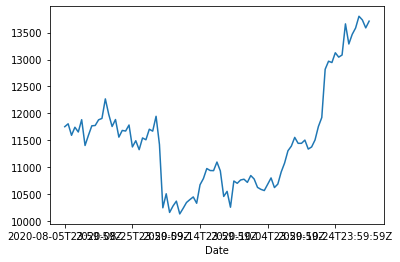

In [ ]:
df['Close'].plot()

In [ ]:
#Refaire la boucle et construire directement le tableau via pf.merge how outside
#https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
#data=pd.merge(dataBTC, dataBTCfutur, on ='Date', how ='inner',suffixes=('_BTC','_BTCfutur'))
##pd.concat  pd.concat([df1, df3], join="inner")


In [ ]:
#importation des données depuis Binance https://medium.com/swlh/retrieving-full-historical-data-for-every-cryptocurrency-on-binance-bitmex-using-the-python-apis-27b47fd8137f


Cas importation des données depuis Yahoo Finance via API yfinance

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



#definir ticker BTC-USD historique depuis 2014 ou contrat futur BTC=F , qui ne cote pas le samedi/dimanche
monticker='BTC-USD'

#recuperer les datas
databtc=yf.Ticker(monticker)

#recuperer l'historique des prix
dataBTC = databtc.history(period='1d',start='2014-09-17',end=datejour)

#afficher
dataBTC

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,29869951617,0,0
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,35116364961,0,0
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,40856321438,0,0


In [ ]:
dataBTC.iloc[:5,1:3] #selection de données avec iloc

,High,Low
Date,,
2014-09-17,468.174011,452.421997
2014-09-18,456.859985,413.104004
2014-09-19,427.834991,384.532013
2014-09-20,423.295990,389.882996
2014-09-21,412.425995,393.181000


In [36]:
def nettoyage(df):
  for column in df.columns:
    if df[column].name == 'Dividends':
      #print('column Dividends Supprimée')
      df= df.drop(labels='Dividends',axis=1)
    elif df[column].name == 'Stock Splits':
     df= df.drop(labels='Stock Splits',axis=1)
     #print('column Stock Splits Supprimée')
    else:
      print('pas de column trouvée') 
  return df

In [37]:
dataBTC = nettoyage(dataBTC)

pas de column trouvée
pas de column trouvée
pas de column trouvée
pas de column trouvée
pas de column trouvée


# Affichage des données 

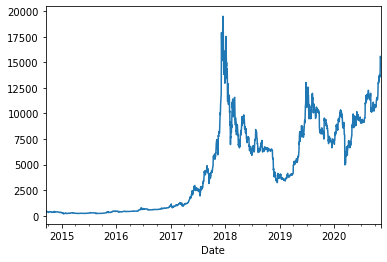

In [34]:
dataBTC['Close'].plot()
plt.show()

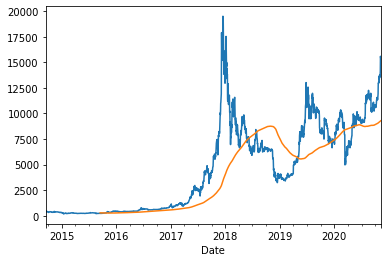

In [ ]:
#calcul ou affichage de moyenne mobile par exemple https://www.datacamp.com/community/tutorials/moving-averages-in-pandas ou p355 Python for Data Analysis 200Week MA
dataBTC['Close'].plot()
dataBTC['Close'].rolling(365).mean().plot()
plt.show()

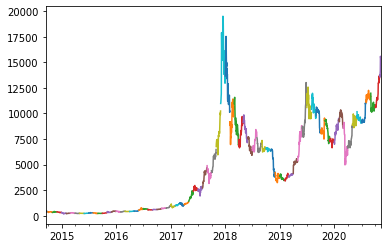

In [ ]:
#couper les données par mois
dataBTC['Close'].resample('M').plot()
plt.show()

# Analyse de la saisonnalite

In [38]:
#analyse de saisonalité https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
dataBTC['Year'] = dataBTC.index.year
dataBTC['Month'] = dataBTC.index.month
dataBTC['Day'] = dataBTC.index.day
#dataBTC=dataBTC.resample('M')
#IDENTIFICATION DES VALEURS DEBUT/FIN DE MOIS 
#def nettoyage2(df):
#effacement de toutes les colonnes des que un zero détecté , il faut faire un tri pas des les premier zero
dimension= np.array (dataBTC.shape)
#print(dimension)
nombredelignes=int(dimension[:1])
#print(nombredelignes)
nombredecolonnes=int(dimension[1:2])
#print(nombredecolonnes) 

#for column in dataBTC.columns:
    #compteur=0
#Open_Month = 387
#Open_Month = dataBTC.loc(['Open'][dataBTC.index[1]]) # recuperation du premier jour dataBTC['Open']['2014-09-17']
Open_Month = dataBTC['Open'][dataBTC.index[1]] # recuperation du premier jour dataBTC['Open']['2014-09-17']

Variation_Month_Percent = 0
#dataBTC['Open_Month']=Open_Month
dataBTC['Open_Month']=dataBTC['Open']
#dataBTC['Open_Month'][1]=
dataBTC['Monthly Gain %'] = 0
Delta_Month=0
compteur=1
dataBTC['Compteur'] = 0
for row in dataBTC.index: 
    #test 
    if (Open_Month !=1 and
        Variation_Month_Percent != 1):
        dataBTC['Open_Month'][row] = Open_Month
        dataBTC['Monthly Gain %'][row] = 100*Delta_Month/Open_Month
        dataBTC['Compteur'][row] = compteur
        compteur= compteur + 1
    #dataBTC['Monthly Gain %'][row] = Variation_Month_Percent
     
    #test debut de mois, si =1 changement du premier m
    if dataBTC['Day'][row]==1:
      Delta_Month= -Open_Month + dataBTC['Open'][row]
      Variation_Month_Percent=100*Delta_Month/Open_Month
      #print(Variation_Month_Percent)
      #print(str(100*Delta_Month/Open_Month)+" %")
      Open_Month = dataBTC['Open'][row]
      #Variation_Month_Percent= 100*(Delta_Month)/(Open_Month) #Erreur dans le calcul du PCTENTAGE
      #print(Open_Month)
      #print(row)
      dataBTC['Open_Month'][row] = Open_Month
      #dataBTC['Monthly Gain %'][row]=Variation_Month_Percent
      dataBTC['Compteur'][row] = compteur
      compteur= compteur + 1

#IL Y A UN MOIS D'ECART, il faut utiliser la fonction shift -1?
#ou faire 2 boucles séparées , comment calculer la valeur du mois dernier


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to b

In [39]:
dataBTC

,Open,High,Low,Close,Volume,Year,Month,Day,Open_Month,Monthly Gain %,Compteur
Date,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,456.859985,0,1
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,456.859985,0,2
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,456.859985,0,3
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,456.859985,0,4
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,456.859985,0,5
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,29869951617,2020,11,3,13780.995117,21,2314
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,35116364961,2020,11,4,13780.995117,21,2315
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,40856321438,2020,11,5,13780.995117,21,2316


In [ ]:
print(dataBTC['Open_Month'])
dataBTC.to_csv('dataBTC.csv', encoding='utf_8_sig')

Date
2014-09-17      456.859985
2014-09-18      456.859985
2014-09-19      456.859985
2014-09-20      456.859985
2014-09-21      456.859985
                  ...     
2020-10-26    10785.010742
2020-10-27    10785.010742
2020-10-28    10785.010742
2020-10-29    10785.010742
2020-10-30    10785.010742
Name: Open_Month, Length: 2236, dtype: float64


In [ ]:
#analyse de saisonalité https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
#nouvelle version
dataBTC['Year'] = dataBTC.index.year
dataBTC['Month'] = dataBTC.index.month
dataBTC['Day'] = dataBTC.index.day
#dataBTC=dataBTC.resample('M')
#IDENTIFICATION DES VALEURS DEBUT/FIN DE MOIS 
#def nettoyage2(df):
#effacement de toutes les colonnes des que un zero détecté , il faut faire un tri pas des les premier zero
dimension= np.array (dataBTC.shape)
#print(dimension)
nombredelignes=int(dimension[:1])
#print(nombredelignes)
nombredecolonnes=int(dimension[1:2])
#print(nombredecolonnes) 

#for column in dataBTC.columns:
    #compteur=0

dataBTC['Open_Month']=dataBTC['Open']
Open_Month = dataBTC['Open'][dataBTC.index[1]] # recuperation du premier jour dataBTC['Open']['2014-09-17']
compteur=1
Changementdemois=0
lastvalue=0
Lastlastvalue=0
#dataBTC['Monthly Gain %'] = 0
#for compteur in int(dataBTC.index[nombredelignes]):
for row in dataBTC.index: 
    #Ecriture de la valeur début si différent du permier jour
    
    if Open_Month !=1 :
        dataBTC['Open_Month'][row] = Open_Month
        #dataBTC['Open_Month'].index[compteur] = Open_Month
       # triple égalité ???
    
    #test debut de mois, si ==1 changement du premier jour, écriture pour de la nouvelle valeur 
    if dataBTC['Day'][row]==1:
        Open_Month = dataBTC['Open'][row]
        dataBTC['Open_Month'][row] = Open_Month
        #Open_Month = dataBTC['Open'].index[compteur]
      #Variation_Month_Percent= 100*(Delta_Month)/(Open_Month) #Erreur dans le calcul du PCTENTAGE
      #print(Open_Month)
      #print(row)
        dataBTC['Open_Month'].row = Open_Month
    Lastlastvalue=lastvalue
    Lastvalue=dataBTC['Day'].shift(periods=+1)
    Currentvalue=dataBTC['Day']
    dataBTC['LastDay']=Lastvalue
    if Lastlastvalue<lastvalue:
       Changementdemois=1
    else:
       Changementdemois=0     
    #if Currentvalue < Lastvalue:
     #  compteur=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [43]:
dataBTC

,Open,High,Low,Close,Volume,Year,Month,Day,Open_Month,Monthly Gain %,Compteur
Date,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,456.859985,0,1
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,456.859985,0,2
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,456.859985,0,3
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,456.859985,0,4
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,456.859985,0,5
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,29869951617,2020,11,3,13780.995117,21,2314
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,35116364961,2020,11,4,13780.995117,21,2315
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,40856321438,2020,11,5,13780.995117,21,2316


In [47]:
dataBTC[::-1]

,Open,High,Low,Close,Volume,Year,Month,Day,Open_Month,Monthly Gain %,Compteur
Date,,,,,,,,,,,
2020-11-07,15514.660156,15737.095703,15430.096680,15435.842773,31826931712,2020,11,7,13780.995117,21,2318
2020-11-06,15579.729492,15903.437500,15226.839844,15565.880859,39837841971,2020,11,6,13780.995117,21,2317
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,40856321438,2020,11,5,13780.995117,21,2316
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,35116364961,2020,11,4,13780.995117,21,2315
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,29869951617,2020,11,3,13780.995117,21,2314
...,...,...,...,...,...,...,...,...,...,...,...
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,456.859985,0,5
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,456.859985,0,4
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,456.859985,0,3


In [ ]:
#Refaire le meme code mais enlever le code en éclatant l'index et la boucle % Monthly Gain par le bas 
#1Ecrire une boucle vers le haut et pas vers le bas
dataBTC=dataBTC[::-1]
#for row in dataBTC.index Lastlastvalue=0
 #   Lastlastvalue=0 
dataBTC

,Open,High,Low,Close,Volume,Year,Month,Day,Open_Month,LastDay
Date,,,,,,,,,,
2020-11-06,15670.734375,15889.180664,15326.832031,15650.411133,74431504384,2020,11,6,13780.995117,5.0
2020-11-05,14133.733398,15706.404297,14102.088867,15579.848633,40856321439,2020,11,5,13780.995117,4.0
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,35116364961,2020,11,4,13780.995117,3.0
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,29869951617,2020,11,3,13780.995117,2.0
2020-11-02,13737.032227,13808.323242,13243.160156,13550.489258,30771455467,2020,11,2,13780.995117,1.0
...,...,...,...,...,...,...,...,...,...,...
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,456.859985,20.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,456.859985,19.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,456.859985,18.0


In [64]:
dataBTC.loc[ ['2020-11-06'], ['Day'] ]

,Day
Date,
2020-11-06,6


In [90]:
df_tmp

,Open,High,Low,Close,Volume,Year,Month,Day,Open_Month,Monthly Gain %,Compteur
Date,,,,,,,,,,,
2020-02-01,9346.357422,9439.323242,9313.239258,9392.875000,25922656496,2020,2,1,9346.357422,-5,2029
2020-02-02,9389.820312,9468.797852,9217.824219,9344.365234,30835736946,2020,2,2,9346.357422,23,2030
2020-02-03,9344.683594,9540.372070,9248.633789,9293.521484,30934096508,2020,2,3,9346.357422,23,2031
2020-02-04,9292.841797,9331.265625,9112.811523,9180.962891,29893183716,2020,2,4,9346.357422,23,2032
2020-02-05,9183.416016,9701.299805,9163.704102,9613.423828,35222060874,2020,2,5,9346.357422,23,2033
2020-02-06,9617.821289,9824.619141,9539.818359,9729.801758,37628823715,2020,2,6,9346.357422,23,2034
2020-02-07,9726.002930,9834.716797,9726.002930,9795.943359,34522718159,2020,2,7,9346.357422,23,2035
2020-02-08,9793.070312,9876.749023,9678.910156,9865.119141,35172043761,2020,2,8,9346.357422,23,2036
2020-02-09,9863.894531,10129.435547,9850.392578,10116.673828,35807884663,2020,2,9,9346.357422,23,2037


In [107]:
df_tmp = dataBTC [ (dataBTC.index.year == 2020) & (dataBTC.index.month == 2)]
df_tmp.loc['Monthly Gain %'] = df_tmp['Open'].iloc[0].copy() - df_tmp['Close'].iloc[-1].copy()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [73]:
#refaire une boucle a l'envers afin afin de calculer fin de mois-début de mois
#dataBTC['Monthly Gain %'] = 0 dataBTC.shift(-1)
Lastday= 1
for row in dataBTC.index:
    #print(dataBTC['Day'][row])
    date = dataBTC.loc[ row, ['Day']]
    #date = dataBTC.index.get_loc(['Day'][row])
    #print(date)

In [ ]:
dimension= np.array (dataBTC.shape)
print(dimension)
nombredelignes=int(dimension[:1])
print(nombredelignes)
nombredecolonnes=int(dimension[1:2])
#dataBTC.index[nombredelignes]

[2236    9]
2236


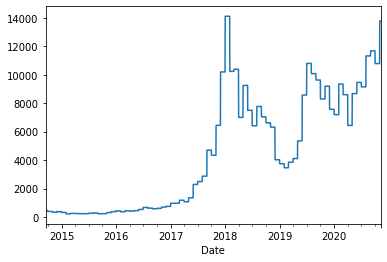

In [ ]:
dataBTC['Open_Month'].plot()
plt.show()


In [ ]:
dataBTC['Open_Month']=dataBTC['Open']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataBTC

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2020-11-02,13737.032227,13808.323242,13243.160156,13550.489258,30771455467
2020-11-03,13550.451172,13984.981445,13325.441406,13950.300781,29869951617
2020-11-04,13950.488281,14218.766602,13580.471680,14133.707031,35116364961


In [ ]:
#Slice de Monthy Gain de 1 mois, il est pas possible d'utiliser le row comme variable de slice, il faut introduire une valeur dans la boucle
indice=0
for row in dataBTC.index: 
  indice= indice+1
  
  dataBTC['Monthly Gain %'][indice:indice+1]
  print(dataBTC['Monthly Gain %'][indice:indice+1])

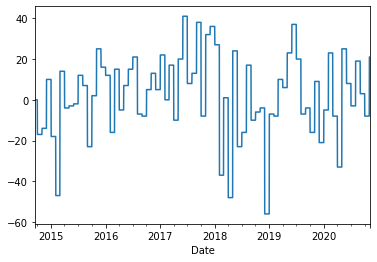

In [ ]:
#dataBTC['Open_Month'].plot()
dataBTC['Monthly Gain %'].plot()

In [ ]:
#Exportation des données pour vérification dans Excel 
dataBTC.to_csv('dataBTC.csv', encoding='utf_8_sig')
#dataBTC.to_xlsv('dataBTC.xlsv', encoding='utf_8_sig')


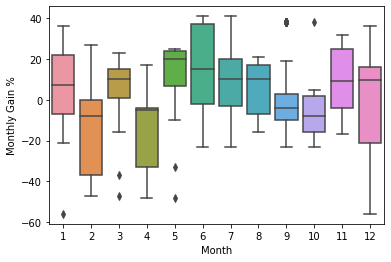

In [ ]:
import seaborn as sns #https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
#sns.boxplot(data=dataBTC['Monthly Gain %'],x='Month')
sns.boxplot(x = dataBTC['Month'], y = dataBTC['Monthly Gain %'] )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

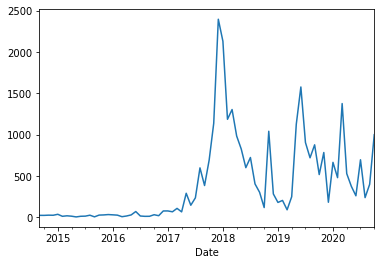

In [ ]:
dataBTC['Close'].resample('M').std().plot()
plt.show()

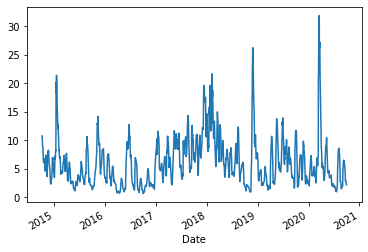

In [ ]:
#analyse de l'écart type 20 periode
#dataDF['Close'].rolling(20).std().plot()
#analyse de l'écart type 20 periode
ecarttype20=(100*dataBTC['Close'].rolling(20).std()/dataBTC['Close'])
ecarttype20.plot()

# Courbe Ln prix = Ln t

Text(0.5, 1.0, 'log Date')

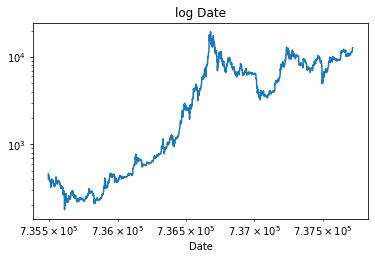

In [ ]:
#pAs assez d'historique https://matplotlib.org/tutorials/introductory/pyplot.html#logarithmic-and-other-nonlinear-axes
dataBTC['Close'].plot()
plt.yscale('log')
plt.xscale('log')
plt.title('log Date')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,177.548025,178.352760,176.645999,177.530334,151266000,0.000,0
2014-09-18,178.069762,178.503091,177.839840,178.476562,94990000,0.000,0
2014-09-19,179.044286,179.381895,177.951459,178.315735,121649000,0.939,0
2014-09-22,178.004772,178.031425,176.565443,176.938599,125553000,0.000,0
2014-09-23,176.298921,177.036352,175.872460,175.925766,111393000,0.000,0
...,...,...,...,...,...,...,...
2020-10-15,343.709991,348.019989,343.130005,347.500000,60357700,0.000,0
2020-10-16,348.959991,350.750000,347.100006,347.290009,89501900,0.000,0
2020-10-19,348.649994,349.329987,341.040009,342.010010,68425600,0.000,0


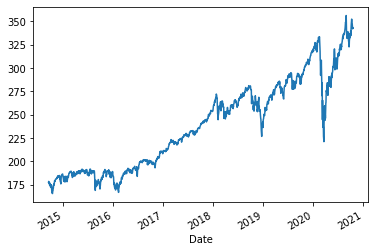

In [ ]:
#Calcul du coefficient de corelation et covaiance BTC/SP500 Python for data Analysis p359
#importer les données 'SPY' ou 'GC=F' pour contrat sur or, et Dxy pour dollar index 
#definir ticker monticker='SPY'
#recuperer les datas
#data=
#spx_px= close_px_all['SPX']
#recuperer l'historique des prix
dataSPY=yf.Ticker('SPY').history(period='1d',start='2014-09-17',end=datejour)
#dataSPY = dataspy.history(period='1d',start='2014-09-17',end=datejour)
 #pour comparaison dates depuis historique du BTC
#dataSPY = yf.Ticker('SPY').history(period='1d',start='2017-12-18',end=datejour)
#afficher
dataSPY['Close'].plot()
dataSPY

# Correlation SPX/BTC/GOLD

In [ ]:
dataSPY['Dividends'][:1]

Date
2014-09-17    0.0
Name: Dividends, dtype: float64

In [ ]:
dataSPY['Close'][0]

In [ ]:
dataSPY[1]

In [ ]:
dataSPY[:5]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,177.548025,178.352760,176.645999,177.530334,151266000,0.000,0
2014-09-18,178.069762,178.503091,177.839840,178.476562,94990000,0.000,0
2014-09-19,179.044286,179.381895,177.951459,178.315735,121649000,0.939,0
2014-09-22,178.004772,178.031425,176.565443,176.938599,125553000,0.000,0
2014-09-23,176.298921,177.036352,175.872460,175.925766,111393000,0.000,0


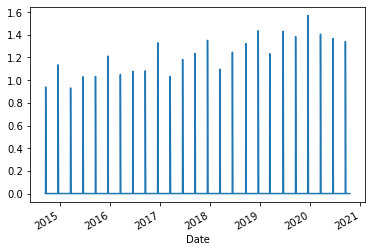

In [ ]:
#dataSPY['Stock Splits'].plot()
dataSPY['Dividends'].plot()

In [ ]:
def nettoyage2(df): 
#effacement de toutes les colonnes des que un zero détecté , il faut faire un tri pas des les premier zero
  dimension= np.array (df.shape)
#print(dimension)
nombredelignes=int(dimension[:1])
#print(nombredelignes)
nombredecolonnes=int(dimension[1:2])
#print(nombredecolonnes) 
for column in df.columns:
    compteur=0
    for row in df.index: 
      if df[column][row]==0:
        compteur = compteur+1
        #print(compteur)
        #print(dataSPY.index)
        #print(column)
        #print(row)
        #dataSPY= dataSPY.drop(labels=column,axis=1)
        #break
    if compteur==nombredelignes: #test si colonnes 
       df= df.drop(labels=column,axis=1)         
return df

NameError: ignored

In [ ]:
#def nettoyage2(df):
#effacement de toutes les colonnes des que un zero détecté , il faut faire un tri pas des les premier zero
dimension= np.array (dataSPY.shape)
#print(dimension)
nombredelignes=int(dimension[:1])
#print(nombredelignes)
nombredecolonnes=int(dimension[1:2])
#print(nombredecolonnes) 

for column in dataSPY.columns:
    compteur=0
    for row in dataSPY.index: 
      if dataSPY[column][row]==0:
        compteur = compteur+1
        #print(compteur)
        #print(dataSPY.index)
        #print(column)
        #print(row)
        #dataSPY= dataSPY.drop(labels=column,axis=1)
        #break
    if compteur==nombredelignes: #test si colonnes 
       dataSPY= dataSPY.drop(labels=column,axis=1)         
#return df

In [ ]:
dataSPY

,Open,High,Low,Close,Volume,Dividends
Date,,,,,,
2014-09-17,177.548025,178.352760,176.645999,177.530334,151266000,0.000
2014-09-18,178.069762,178.503091,177.839840,178.476562,94990000,0.000
2014-09-19,179.044286,179.381895,177.951459,178.315735,121649000,0.939
2014-09-22,178.004772,178.031425,176.565443,176.938599,125553000,0.000
2014-09-23,176.298921,177.036352,175.872460,175.925766,111393000,0.000
...,...,...,...,...,...,...
2020-10-15,343.709991,348.019989,343.130005,347.500000,60357700,0.000
2020-10-16,348.959991,350.750000,347.100006,347.290009,89501900,0.000
2020-10-19,348.649994,349.329987,341.040009,342.010010,68425600,0.000


In [ ]:
nettoyage(dataSPY)

pas de column trouvée
pas de column trouvée
pas de column trouvée
pas de column trouvée
pas de column trouvée
column Dividends Supprimée
column Stock Splits Supprimée


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,177.548025,178.352760,176.645999,177.530334,151266000
2014-09-18,178.069762,178.503091,177.839840,178.476562,94990000
2014-09-19,179.044286,179.381895,177.951459,178.315735,121649000
2014-09-22,178.004772,178.031425,176.565443,176.938599,125553000
2014-09-23,176.298921,177.036352,175.872460,175.925766,111393000
...,...,...,...,...,...
2020-10-13,352.279999,352.470001,349.089996,350.130005,73255500
2020-10-14,350.750000,351.929993,347.140015,347.929993,57958700
2020-10-15,343.709991,348.019989,343.130005,347.500000,60357700


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-18,20650.0,20650.0,18345.0,19100.0,1054,0,0
2017-12-19,19135.0,19725.0,17180.0,18200.0,559,0,0
2017-12-20,17745.0,18350.0,16435.0,17040.0,784,0,0
2017-12-21,16400.0,17270.0,15080.0,15330.0,879,0,0
2017-12-22,15595.0,15825.0,12265.0,14135.0,2374,0,0
...,...,...,...,...,...,...,...
2020-09-24,10240.0,10750.0,10190.0,10670.0,8985,0,0
2020-09-25,10630.0,10805.0,10560.0,10606.8,6120,0,0
2020-09-28,10800.0,11080.0,10795.0,10960.0,4100,0,0


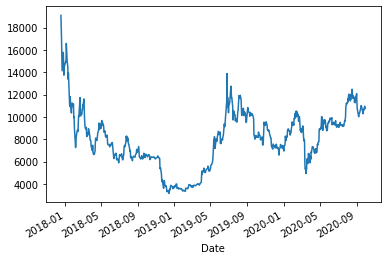

In [ ]:
#données du contrat futur CME
#data=yf.Ticker('BTC=F')
dataBTCfutur = yf.Ticker('BTC=F').history(period='1d',start='2017-12-18',end=datejour)
dataBTCfutur['Close'].plot()
dataBTCfutur
#np.cov(dataDF['Close'],dataDFspy['Close'])

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,1236.2,1236.2,1221.9,1234.4,10,0,0
2014-09-18,1216.2,1225.7,1216.2,1225.7,5,0,0
2014-09-19,1218.3,1218.3,1215.3,1215.3,4,0,0
2014-09-22,1214.9,1216.8,1212.4,1216.8,7,0,0
2014-09-23,1221.0,1221.0,1221.0,1221.0,5,0,0
...,...,...,...,...,...,...,...
2020-09-23,1875.5,1875.5,1859.9,1859.9,5,0,0
2020-09-24,1851.5,1868.3,1851.5,1868.3,365,0,0
2020-09-25,1856.3,1857.7,1856.3,1857.7,4,0,0


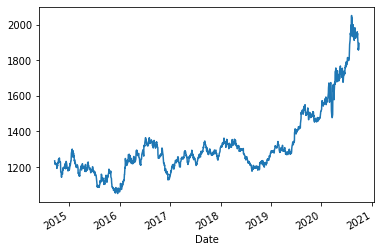

In [ ]:
#importer les données 'SPY' ou 'GC=F' pour contrat sur or, et Dxy pour dollar index 
#recuperer l'historique des prix
dataGOLD=yf.Ticker('GC=F').history(period='1d',start='2014-09-17',end=datejour)
#dataSPY = dataspy.history(period='1d',start='2014-09-17',end=datejour)
 #pour comparaison dates depuis historique du BTC
#dataSPY = yf.Ticker('SPY').history(period='1d',start='2017-12-18',end=datejour)
#afficher
dataGOLD['Close'].plot()
dataGOLD

In [ ]:
#concatenation des donnes ne marche pas, il faut utiliser les merge avec les inner et outer
BTC_SPY=pd.merge(dataBTC, dataSPY, on ='Date', how ='inner',suffixes=('_BTC','_SPY'))
#matrix= BTC_SPY [['Close_BTC']>3000]

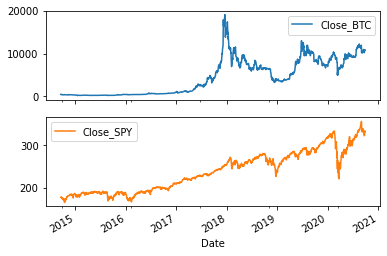

In [ ]:
#BTC_SPY[['Close_BTC','Close_SPY']].plot()
BTC_SPY[['Close_BTC','Close_SPY']].plot(subplots=True)
plt.show()

In [ ]:
#concatenation des donnes ne marche pas, il faut utiliser les merge avec inner  

BTC_SPY_GOLD=pd.merge(BTC_SPY, dataGOLD, on='Date', how='inner')
BTC_SPY_GOLD

,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock Splits_BTC,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Dividends_SPY,Stock Splits_SPY,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,21056800,0,0,177.55,178.35,176.65,177.53,151266000,0.000,0,1236.2,1236.2,1221.9,1234.4,10,0,0
2014-09-18,456.86,456.86,413.10,424.44,34483200,0,0,178.07,178.50,177.84,178.48,94990000,0.000,0,1216.2,1225.7,1216.2,1225.7,5,0,0
2014-09-19,424.10,427.83,384.53,394.80,37919700,0,0,179.04,179.38,177.95,178.32,121649000,0.939,0,1218.3,1218.3,1215.3,1215.3,4,0,0
2014-09-22,399.10,406.92,397.13,402.15,24127600,0,0,178.00,178.03,176.57,176.94,125553000,0.000,0,1214.9,1216.8,1212.4,1216.8,7,0,0
2014-09-23,402.09,441.56,396.20,435.79,45099500,0,0,176.30,177.04,175.87,175.93,111393000,0.000,0,1221.0,1221.0,1221.0,1221.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23,10539.46,10637.85,10185.77,10225.86,22986733997,0,0,330.90,331.20,322.10,322.64,93112200,0.000,0,1875.5,1875.5,1859.9,1859.9,5,0,0
2020-09-24,10227.48,10765.79,10215.21,10745.55,23017536742,0,0,321.22,326.80,319.80,323.50,76681300,0.000,0,1851.5,1868.3,1851.5,1868.3,365,0,0
2020-09-25,10747.47,10757.55,10594.05,10702.29,21232549821,0,0,322.58,329.58,321.64,328.73,71069400,0.000,0,1856.3,1857.7,1856.3,1857.7,4,0,0


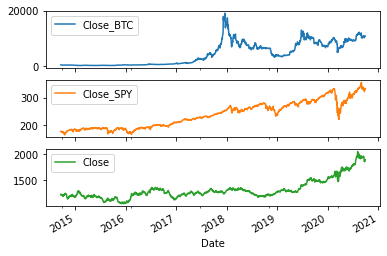

In [ ]:
BTC_SPY_GOLD[['Close_BTC','Close_SPY','Close']].plot(subplots=True)
plt.show()

In [ ]:
BTC_SPY[:,:]

TypeError: ignored

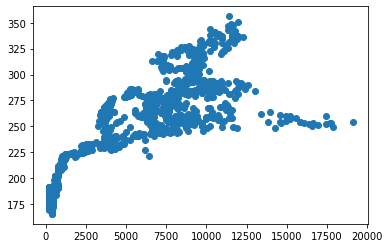

In [ ]:
plt.scatter(BTC_SPY['Close_BTC'],BTC_SPY['Close_SPY'])
#il faudrait filtrer sur les données depuis 2020 avec la fonction iloc https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer

In [ ]:
#affichage via seaborn
import seaborn as sns
sns.pairplot(BTC_SPY)

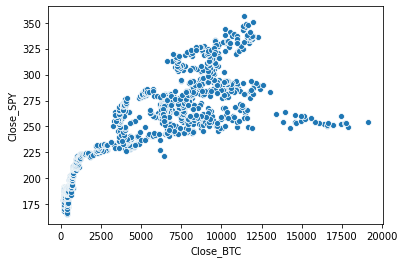

In [ ]:
sns.scatterplot(BTC_SPY['Close_BTC'],BTC_SPY['Close_SPY'])

In [ ]:
#sns.heatmap permet de voir les relations entre les différents actifs par exemple les covariance 

In [ ]:
#calcul covariance et #le calcul est possible que en données hebdomadaires SPX/BTCUSD ou SPX/CME BTC futur BTC=F 
BTC_SPY[['Close_BTC','Close_SPY']].corr()

,Close_BTC,Close_SPY
Close_BTC,1.000000,0.865384
Close_SPY,0.865384,1.000000


In [ ]:
BTC_SPY_GOLD[['Close_BTC','Close_SPY','Close']].corr()

,Close_BTC,Close_SPY,Close
Close_BTC,1.000000,0.865962,0.651986
Close_SPY,0.865962,1.000000,0.755892
Close,0.651986,0.755892,1.000000


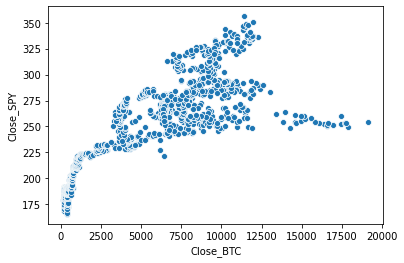

In [ ]:
import seaborn as sns
sns.scatterplot(BTC_SPY_GOLD['Close_BTC'],BTC_SPY_GOLD['Close_SPY'])


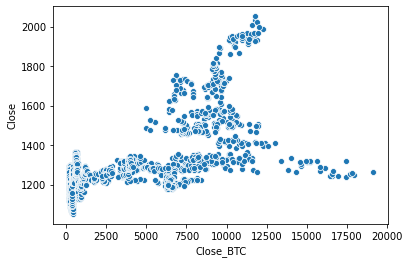

In [ ]:
sns.scatterplot(BTC_SPY_GOLD['Close_BTC'],BTC_SPY_GOLD['Close'])
sns.scatterplot()

In [ ]:
dimension= np.array (BTC_SPY.shape)
print(dimension)
nombredelignes=int(dimension[:1])
print(nombredelignes)
nombredecolonnes=int(dimension[1:2])
print(nombredecolonnes)

[1516   14]
1516
14


In [ ]:
BTC_SPY=BTC_SPY[nombredelignes-365:nombredelignes]
BTC_SPY

,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock Splits_BTC,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Dividends_SPY,Stock Splits_SPY
Date,,,,,,,,,,,,,,
2019-04-15,5167.32,5196.61,5024.07,5067.11,12290155060,0,0,282.05,282.16,280.93,281.79,49596700,0.000,0
2019-04-16,5066.58,5238.95,5055.19,5235.56,11618660197,0,0,282.74,282.80,281.33,281.98,52153200,0.000,0
2019-04-17,5236.14,5274.28,5219.21,5251.94,12438480676,0,0,283.18,283.21,280.84,281.29,58268300,0.000,0
2019-04-18,5251.48,5319.99,5250.51,5298.39,13256489918,0,0,281.92,282.13,280.52,281.84,68708500,0.000,0
2019-04-22,5312.49,5422.69,5280.28,5399.37,14601631647,0,0,281.01,282.25,280.92,282.08,40160100,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-18,10951.82,11034.91,10829.66,10944.59,26341903912,0,0,335.37,335.49,327.97,330.65,105877900,1.339,0
2020-09-21,10934.93,10988.30,10380.26,10462.26,28884999244,0,0,325.70,327.13,321.73,326.97,99450800,0.000,0
2020-09-22,10459.62,10568.08,10382.73,10538.46,23621787804,0,0,328.57,330.90,325.86,330.30,63612100,0.000,0


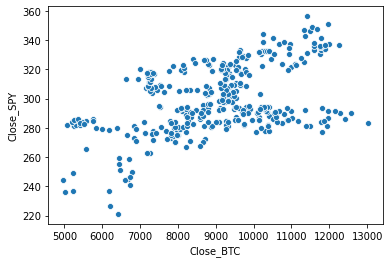

In [ ]:
sns.scatterplot(BTC_SPY['Close_BTC'],BTC_SPY['Close_SPY'])

In [ ]:
BTC_SPY[['Close_BTC','Close_SPY']].corr()

,Close_BTC,Close_SPY
Close_BTC,1.000000,0.493884
Close_SPY,0.493884,1.000000


In [ ]:
dimension= np.array (BTC_SPY_GOLD.shape)
print(dimension)
nombredelignes=int(dimension[:1])
print(nombredelignes)
nombredecolonnes=int(dimension[1:2])
print(nombredecolonnes)

[1503   21]
1503
21


In [ ]:
BTC_SPY_GOLD=BTC_SPY_GOLD[nombredelignes-365:nombredelignes]
BTC_SPY_GOLD

,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock Splits_BTC,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Dividends_SPY,Stock Splits_SPY,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-10,5204.11,5421.65,5193.38,5324.55,15504590933,0,0,279.65,280.26,279.21,280.16,52601500,0.000,0,1304.0,1309.1,1301.5,1309.1,66,0,0
2019-04-11,5325.08,5354.23,5017.30,5064.49,16555616019,0,0,280.68,280.69,279.47,280.08,55093100,0.000,0,1307.0,1307.1,1288.6,1288.6,420,0,0
2019-04-12,5061.20,5103.27,4955.85,5089.54,13675206312,0,0,281.82,282.28,280.13,281.98,69727800,0.000,0,1293.4,1293.4,1289.2,1290.6,607,0,0
2019-04-15,5167.32,5196.61,5024.07,5067.11,12290155060,0,0,282.05,282.16,280.93,281.79,49596700,0.000,0,1284.8,1287.3,1282.3,1286.8,523,0,0
2019-04-16,5066.58,5238.95,5055.19,5235.56,11618660197,0,0,282.74,282.80,281.33,281.98,52153200,0.000,0,1285.2,1285.2,1272.2,1272.6,643,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-18,10951.82,11034.91,10829.66,10944.59,26341903912,0,0,335.37,335.49,327.97,330.65,105877900,1.339,0,1950.5,1952.1,1949.0,1952.1,38,0,0
2020-09-21,10934.93,10988.30,10380.26,10462.26,28884999244,0,0,325.70,327.13,321.73,326.97,99450800,0.000,0,1946.2,1946.2,1883.4,1901.2,52,0,0
2020-09-22,10459.62,10568.08,10382.73,10538.46,23621787804,0,0,328.57,330.90,325.86,330.30,63612100,0.000,0,1913.1,1913.1,1898.6,1898.6,331,0,0


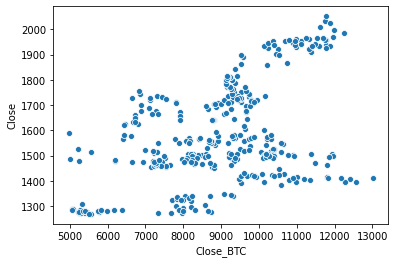

In [ ]:
sns.scatterplot(BTC_SPY_GOLD['Close_BTC'],BTC_SPY_GOLD['Close'])

In [ ]:
BTC_SPY_GOLD[['Close_BTC','Close_SPY','Close']].corr()

,Close_BTC,Close_SPY,Close
Close_BTC,1.000000,0.504778,0.478151
Close_SPY,0.504778,1.000000,0.565346
Close,0.478151,0.565346,1.000000


In [ ]:
#analyse seasonalité statsmodel libreariy https://www.machinelearningplus.com/time-series/time-series-analysis-python/
dataBTCfutur.reset_index(inplace=True)

In [ ]:

dataBTCfutur
# Prepare data
dataBTCfutur['year'] = [dataBTCfutur.year for d in dataBTCfutur.date]
dataBTCfutur['month'] = [d.strftime('%b') for d in dataBTCfutur.date]
years = dataBTCfutur['year'].unique()

AttributeError: ignored

In [ ]:
#strategie contango et envoi d'email https://stackoverflow.com/questions/62097804/how-to-send-email-notification-when-colab-processing-is-complete
#object vendre BTC si spot>future + x%, à l'échéance du futur, récupérer BTC, réitérer opération
data=pd.merge(dataBTC, dataBTCfutur, on ='Date', how ='inner',suffixes=('_BTC','_BTCfutur'))
data['DeltaCloseBTC_BTCfutur']=data['Close_BTC']-data['Close_BTCfutur']
data['%DeltaCloseBTC_BTCfutur']=100*(data['Close_BTC']-data['Close_BTCfutur'])/data['Close_BTC']
data

,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock Splits_BTC,Open_BTCfutur,High_BTCfutur,Low_BTCfutur,Close_BTCfutur,Volume_BTCfutur,Dividends_BTCfutur,Stock Splits_BTCfutur,DeltaCloseBTC_BTCfutur,%DeltaCloseBTC_BTCfutur
Date,,,,,,,,,,,,,,,,
2017-12-18,19106.40,19371.00,18355.90,19114.20,14839499776,0,0,20650.0,20650.0,18345.0,19100.0,1054,0,0,14.20,0.074290
2017-12-19,19118.30,19177.80,17275.40,17776.70,16894499840,0,0,19135.0,19725.0,17180.0,18200.0,559,0,0,-423.30,-2.381207
2017-12-20,17760.30,17934.70,16077.70,16624.60,22149699584,0,0,17745.0,18350.0,16435.0,17040.0,784,0,0,-415.40,-2.498707
2017-12-21,16642.40,17567.70,15342.70,15802.90,16516599808,0,0,16400.0,17270.0,15080.0,15330.0,879,0,0,472.90,2.992489
2017-12-22,15898.00,15943.40,11833.00,13831.80,22197999616,0,0,15595.0,15825.0,12265.0,14135.0,2374,0,0,-303.20,-2.192050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,10227.48,10765.79,10215.21,10745.55,23017536742,0,0,10240.0,10750.0,10190.0,10670.0,8985,0,0,75.55,0.703082
2020-09-25,10747.47,10757.55,10594.05,10702.29,21232549821,0,0,10630.0,10805.0,10560.0,10606.8,6120,0,0,95.49,0.892239
2020-09-28,10771.64,10949.12,10716.68,10721.33,22720365389,0,0,10800.0,11080.0,10795.0,10960.0,4100,0,0,-238.67,-2.226123


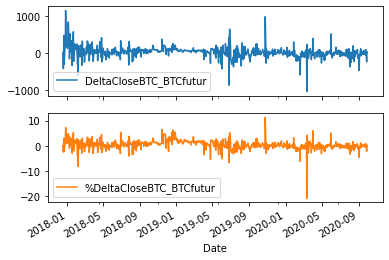

In [ ]:
data[['DeltaCloseBTC_BTCfutur','%DeltaCloseBTC_BTCfutur']].plot(subplots=True)
plt.show()



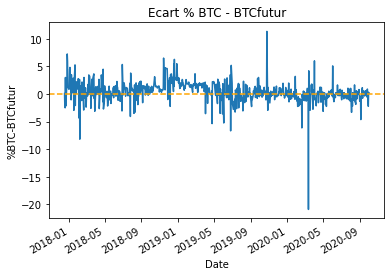

In [ ]:
data['%DeltaCloseBTC_BTCfutur'].plot()
plt.title('Ecart % BTC - BTCfutur')
plt.ylabel('%BTC-BTCfutur')
plt.axhline(0,linestyle='--', color='orange')

In [ ]:
deltaPriceBTC_futur= dataBTC['Close']-dataBTCfutur['Close']
deltaPriceBTC_futur

In [ ]:
#analyse de la saisonalité https://deffro.github.io/time%20series/exploratory%20data%20analysis/data%20visualization/time-series-analysis/ data['year_month'] = pd.to_datetime(data['year_month'])
#https://datalab.marine.rutgers.edu/2020/03/modeling-seasonal-data/

In [ ]:
#comment enlever des 0 des data
#il faut une boucle
dataBTC

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2020-10-03,10583.806641,10614.091797,10527.978516,10565.493164,17094010304,0,0
2020-10-04,10567.919922,10700.791016,10531.342773,10684.428711,17546792792,0,0
2020-10-05,10688.034180,10804.000977,10646.443359,10804.000977,19385191766,0,0


In [ ]:
#remplacement des valeurs 0 pa NaN

dataBTC.where( dataBTC!=0 ,True,False)
#supprimer les colonnes contenant NaN
dataBTC.del(['Dividends'])

SyntaxError: ignored

In [ ]:
print(type(dataBTC['Dividends'][1:10]))
dataBTC['Open']

<class 'pandas.core.series.Series'>


Date
2014-09-17      465.864014
2014-09-18      456.859985
2014-09-19      424.102997
2014-09-20      394.673004
2014-09-21      408.084991
                  ...     
2020-10-03    10583.806641
2020-10-04    10567.919922
2020-10-05    10688.034180
2020-10-06    10799.778320
2020-10-07    10599.042969
Name: Open, Length: 2212, dtype: float64

In [ ]:
import smtplib

sender = 'from@fromdomain.com'
receivers = ['to@todomain.com']

message = """From: From Person <from@fromdomain.com>
To: To Person <to@todomain.com>
Subject: SMTP e-mail test

This is a test e-mail message.
"""

try:
   smtpObj = smtplib.SMTP('mail.your-domain.com', 25)
   smtpObj.sendmail(sender, receivers, message)         
   print "Successfully sent email"
except SMTPException:
   print "Error: unable to send email"

In [ ]:
download=yf.download(monticker,start='2014-1-1',end=datejour)

[*********************100%***********************]  1 of 1 completed


In [ ]:
dataDF.tail(7)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-14,10328.73,10800.01,10266.01,10680.84,35453581940,0,0
2020-09-15,10677.75,10938.63,10656.46,10796.95,32509451925,0,0
2020-09-16,10797.76,11100.12,10704.88,10974.91,30769986455,0,0
2020-09-17,10973.25,11037.42,10774.63,10948.99,38151810523,0,0
2020-09-18,10951.82,11034.91,10829.66,10944.59,26341903912,0,0
2020-09-19,10933.75,11134.09,10909.62,11094.35,22764204008,0,0
2020-09-20,11095.87,11095.87,10814.48,10938.27,24699523788,0,0


In [ ]:
#predire pour les 30 prochains jours le prix du BTC
prediction_days= 30
dataDF['Prediction'] = dataDF[['Close']].shift(-prediction_days)
dataDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Prediction
Date,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,21056800,0,0,383.76
2014-09-18,456.86,456.86,413.10,424.44,34483200,0,0,391.44
2014-09-19,424.10,427.83,384.53,394.80,37919700,0,0,389.55
2014-09-20,394.67,423.30,389.88,408.90,36863600,0,0,382.85
2014-09-21,408.08,412.43,393.18,398.82,26580100,0,0,386.48
...,...,...,...,...,...,...,...,...
2020-09-16,10797.76,11100.12,10704.88,10974.91,30769986455,0,0,NaN
2020-09-17,10973.25,11037.42,10774.63,10948.99,38151810523,0,0,NaN
2020-09-18,10951.82,11034.91,10829.66,10944.59,26341903912,0,0,NaN


In [ ]:
df=dataDF.drop(['Dividends'],1)
df=df.drop(['Stock Splits'],1)
df
dimension= np.array (df.shape)
print(dimension)
nombredelignes=dimension[:1]
print(nombredelignes)
nombredecolonnes=dimension[1:2]
print(nombredecolonnes)
#afficher le contenur
df.tail(1)

[2195    5]
[2195]
[5]


,Open,High,Low,Close,Volume
Date,,,,,
2020-09-20,11095.87,11095.87,10814.48,10938.27,24699523788


In [ ]:
#recuper l'heure de la machine
from datetime import datetime
now=datetime.now()
now
datejour=str(now.strftime('%Y-%m-%d'))
datejour

#comment récupérer uniquement la date et pas l'heure
#dataDF.tail(31)

'2020-09-22'

In [ ]:
#Create the independant data set
#Convert the dataframe to a numpy array and drop the prediction column
X = np.array(dataDF.drop(['Prediction'],1))
#Enlever les derniers 'n' colonnes ou 'n' est la prediction
X = X[:len(dataDF)-prediction_days]
print(X)

[[4.65860000e+02 4.68170000e+02 4.52420000e+02 ... 2.10568000e+07
  0.00000000e+00 0.00000000e+00]
 [4.56860000e+02 4.56860000e+02 4.13100000e+02 ... 3.44832000e+07
  0.00000000e+00 0.00000000e+00]
 [4.24100000e+02 4.27830000e+02 3.84530000e+02 ... 3.79197000e+07
  0.00000000e+00 0.00000000e+00]
 ...
 [1.19908800e+04 1.20289200e+04 1.16873300e+04 ... 2.45028511e+10
  0.00000000e+00 0.00000000e+00]
 [1.17615000e+04 1.19004100e+04 1.17100600e+04 ... 2.01752429e+10
  0.00000000e+00 0.00000000e+00]
 [1.18780300e+04 1.18992600e+04 1.15649800e+04 ... 2.37624260e+10
  0.00000000e+00 0.00000000e+00]]


In [ ]:
#create the dependent data set
#convert teh dataframe to a numpy array
y= np.array(dataDF['Prediction'])
y=y[:-prediction_days]
print(y)

[  383.76   391.44   389.55 ... 10944.59 11094.35 10938.27]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [ ]:
#set the prediction_days_array equalt the last 30 rows from the original data set
prediction_days_array = np.array(dataDF.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')

# Fair valuation trendline

In [ ]:
#video Benjamin Cowen the beauty of Mathematics 5
#Vue logarithmique, bas , calculer l ecart par rapport au point bas, normaliser, et tirer trendline des sommets en vue logarthmique